<a href="https://colab.research.google.com/github/ssbrahme/stock-prediction/blob/main/python_stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
# description - uses artificial recurrent neural network called Long Short Term Memory (LSTM)
#               to predict closing stock price of a stock, using past 60 day stock price


In [93]:
# import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [94]:
# get the stock quote
df = web.DataReader('AAPL', data_source= 'yahoo', start= '2017-01-01', end= '2021-02-10')

# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.459938
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.429203
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.568691
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.876030
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.131361
...,...,...,...,...,...,...
2021-02-04,137.399994,134.589996,136.300003,137.389999,84183100.0,137.184998
2021-02-05,137.419998,135.860001,137.350006,136.759995,75524000.0,136.759995
2021-02-08,136.960007,134.919998,136.029999,136.910004,71297200.0,136.910004


In [95]:
# get the shape of the data frame
df.shape

(1034, 6)

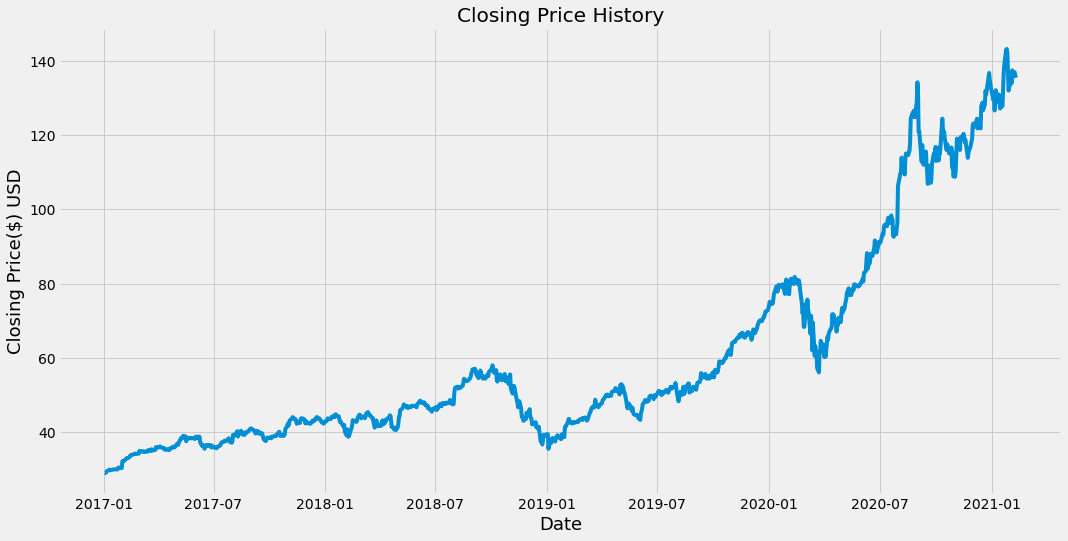

In [96]:
# visualize closing price history
plt.figure (figsize=(16,8))
plt.title ('Closing Price History')
plt.plot(df.Close)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price($) USD',fontsize=18)
plt.show ()

In [97]:
# create data frame with only 'close' column
data = df.filter(['Close'])

# convert the data frame into numpy array
dataset = data.values

# get number of rows to train the LSTM model 
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

828

In [98]:
# Scale the data
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[2.84711308e-04],
       [0.00000000e+00],
       [1.29211148e-03],
       ...,
       [9.45249882e-01],
       [9.37365784e-01],
       [9.31934616e-01]])

In [99]:
# create scaled training dataset
train_data =  scaled_data[0:training_data_len , :]

# split the data into x_train and y_train datasets
x_train = [] 
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.00028471, 0.        , 0.00129211, 0.00413912, 0.00650432,
       0.00676712, 0.00816873, 0.00707372, 0.00661382, 0.00871623,
       0.00869432, 0.00823442, 0.00871623, 0.00889143, 0.00865053,
       0.01283343, 0.01296484, 0.01298673, 0.01228593, 0.01167273,
       0.02787877, 0.02739696, 0.02860147, 0.03125136, 0.03396698,
       0.03508387, 0.03591608, 0.03525907, 0.03782137, 0.04161011,
       0.04268319, 0.04233281, 0.0431431 , 0.0452893 , 0.04618721,
       0.044917  , 0.04520171, 0.04579299, 0.04592442, 0.05205641,
       0.05023873, 0.05203452, 0.05107091, 0.05146513, 0.05032632,
       0.0496255 , 0.05063292, 0.05076431, 0.05030443, 0.05352374,
       0.05402743, 0.05249443, 0.05571374, 0.05216591, 0.05562612,
       0.05453112, 0.05391792, 0.05444354, 0.06083835, 0.06153913])]
[0.06112302337210834]

[array([0.00028471, 0.        , 0.00129211, 0.00413912, 0.00650432,
       0.00676712, 0.00816873, 0.00707372, 0.00661382, 0.00871623,
       0.00869432, 0.00823442, 0.00

In [100]:
# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train) , np.array(y_train)

In [101]:
# reshape x_train data - to satisfy LSTM standard fo 3 dimensional data consisting of samples, time-steps and features
x_train = np.reshape(x_train, (len(x_train),x_train.shape[1],1 ))
x_train.shape

(768, 60, 1)

In [102]:
# build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1], 1 )))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [103]:
# compile the model
model.compile(optimizer= 'adam', loss= 'mean_squared_error' )

In [104]:
# train the model
model.fit(x_train, y_train, batch_size= 1,epochs= 1)

768/768 [==============================] - 28s 32ms/step - loss: 0.0024


In [105]:
# create tersting dataset
# create a new array containing scaled data with index from the training dataset last index to the length of the entire dataset
test_data = scaled_data[training_data_len - 60 : , :]

# create datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , :]

for i in range (60, len(test_data)):
  x_test.append(test_data[i-60 : i , 0])



In [106]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [107]:
# reshape the data to get 3 dimensional shape for LSTM
x_test = np.reshape(x_test , ( x_test.shape[0] ,x_test.shape[1], 1  ))



In [108]:
# get model predicted price values for x_test dataset
pred = model.predict(x_test)

# inverse transform
pred = scaler.inverse_transform(pred)


In [109]:
# find out RMSE 
rmse = np.sqrt(np.mean( pred - y_test)**2 )
rmse


2.2342076347869577

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


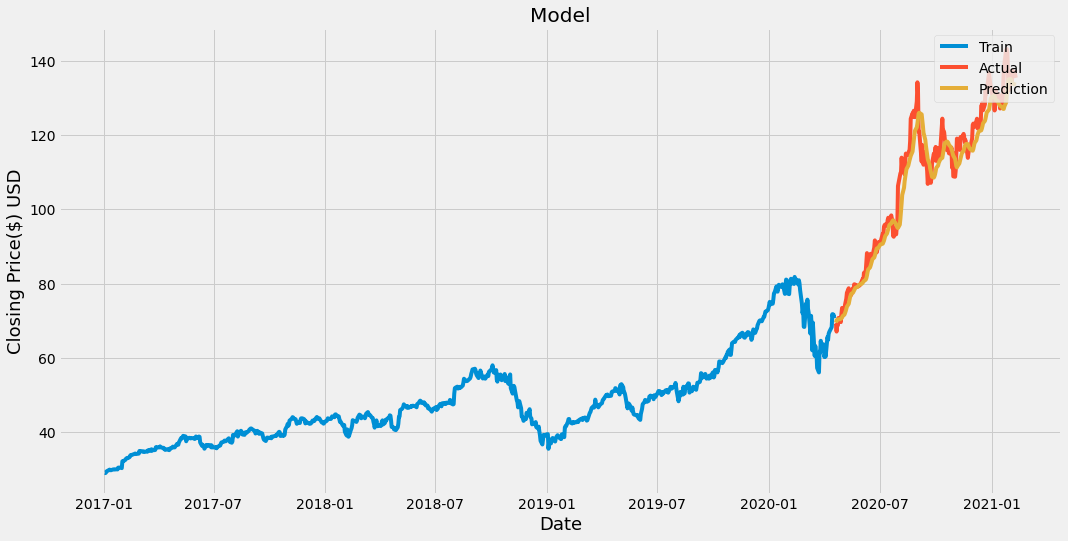

In [110]:
# plot the data
train = data[ : training_data_len]
finals = data[training_data_len : ]
finals['Prediction']= pred

# visualize the data

plt.figure (figsize= (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Closing Price($) USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(finals[['Close', 'Prediction']])
plt.legend(['Train','Actual','Prediction'], loc  = 'upper right')
plt.show()


In [111]:
# show the actual price and predicted price
finals

,Close,Prediction
Date,,
2020-04-20,69.232498,69.482628
2020-04-21,67.092499,70.096825
2020-04-22,69.025002,70.290436
2020-04-23,68.757500,70.374001
2020-04-24,70.742500,70.357597
...,...,...
2021-02-04,137.389999,134.030228
2021-02-05,136.759995,133.795868
2021-02-08,136.910004,133.663910


In [112]:
# predict for a specific date

# get the quote
stock_quote = web.DataReader('AAPL', data_source= 'yahoo', start= '2017-01-01', end= '2021-02-11')

# create new dataframe
new_df = stock_quote.filter(['Close'])

# get the 60-day closing price values and convert the df into an array
last_60_days =  new_df[-60: ].values

# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create empty list
X_test = []

# Append past 60 days to the test list
X_test.append(last_60_days_scaled)

#convert the X_test to numpy array
X_test = np.array(X_test)

# reshape the data to be 3 dimensional
X_test = np.reshape(X_test, ( X_test.shape[0], X_test.shape[1] , 1))

# get predicted scaled price
pred_price = model.predict (X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[133.41933]]


In [113]:
# get the quote
stock_quote2 = web.DataReader('AAPL', data_source= 'yahoo', start= '2021-02-10', end= '2021-02-10')
print(stock_quote2)


                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2021-02-10  136.990005  134.399994  ...  70527203  135.389999

[1 rows x 6 columns]
